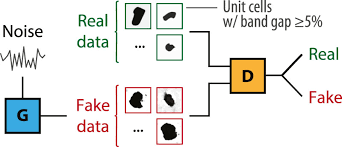

# Phase 1 train Discriminator
Real images are combined with fake iamges from generator

Discriminator trains to distinguisch real from fake
# Phase 2 train Generator

Produce fake iamges with generator

Feed only these fake images to the generator with all  labels set as real

This causees the generator to attmpt to produce images 
the discriminator believes to be real

Generator never gets top see the actual real images
It generates convincing iamges only based off gradients flowing back through the discriminator

# Difficulties with GANs

Training Resources

Mode collapse
1. Generator produces only one image
2. Deep Convolutional GANs

Instability
1. Experiment with hyparameters

Normally used for photos
Needs GPUs

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

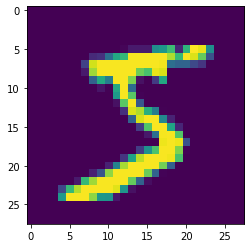

In [6]:
plt.imshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
y_train==0

array([False,  True, False, ..., False, False, False])

In [9]:
only_zeros = X_train[y_train==0]

In [10]:
only_zeros.shape

(5923, 28, 28)

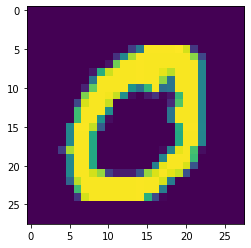

In [17]:
plt.imshow(only_zeros[4])

In [18]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Reshape,Flatten

In [19]:
from tensorflow.keras.models import Sequential

In [24]:
disc = Sequential()
disc.add(Flatten(input_shape=[28,28]))
disc.add(Dense(150,activation='relu'))
disc.add(Dense(150,activation='relu'))
# Final output layer
disc.add(Dense(1,activation='sigmoid'))
disc.compile(loss='binary_crossentropy',optimizer='adam')

In [25]:
codings_size=100
generator = Sequential()
generator.add(Dense(100,activation='relu',input_shape=[codings_size]))
generator.add(Dense(150,activation='relu'))
generator.add(Dense(784,activation='relu'))
generator.add(Reshape([28,28]))

In [26]:
GAN = Sequential([generator, disc])

In [27]:
disc.trainbale = False

In [29]:
GAN.compile(loss='binary_crossentropy',optimizer ='adam')

In [30]:
batch_size = 32

In [31]:
my_data  = only_zeros

In [32]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [33]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [35]:
dataset = dataset.batch(batch_size,drop_remainder=True).prefetch(1)

In [36]:
epochs=1

In [45]:
generator, disc = GAN.layers

In [49]:
for epoch in range(epochs):
    print(f"Currently on Epoch {epoch+1}")
    i=0
    for X_batch in dataset:
        i = i+1
        if i%100 ==0:
            print(f"\t Currently on batch number {i} of {lne(my_data)//batch_size} ")
        #Disc training phase
        
        noise = tf.random.normal(shape=[batch_size,codings_size])
        gen_images = generator(noise)
        X_fake_vs_real = tf.concat([gen_images,tf.dtypes.cast(X_batch, tf.float32)],axis=0)
        y1 = tf.costant([[0.0]*batch_size]+[[1.0]]*batch_size)
        disc.trainbale = True
        disc.train_on_batch(X_fake_vs_real,y1)
        
        #Generator training phase
        noise = tf.random.normal(shape=[batch_size,codings_size])
        y2 = tf.cosntant([[1.0]]*batch_size)
        disc.trainbale = False
        GAN.train_on_batch(noise,y2)

Currently on Epoch 1


InvalidArgumentError: ConcatOp : Ranks of all input tensors should match: shape[0] = [32,28,28] vs. shape[1] = [32,32,28,28] [Op:ConcatV2] name: concat